<h1><center>Endo of Term Project Report</center></h1>

**Group 17 Members:**

Chris Lin -  15787154 <br> 


<h2>Introduction:</h2>


Chronic kidney disease (CKD) is a problem that drastically affects the quality of life of those who are affected by it. The complications from kidney disease are many, from having a diminished quality of life to having a stroke or heart attack, the effects can be life altering to life threatening.  According to the National Institute of Diabetes and Digestive and Kidney Disease, approximately 14% of the American population have CKD (2016).  Since the disease is so widespread, it is in the best interest of the public to be able to have tools to effectively diagnose CKD in order to avoid future complications for patients. 

The question that we will be trying to answer through our analysis is: **“Which variables are most effective in classifying whether a patient has CKD or not, and is using K-nn classification to predict CKD effective?”**

To effectively answer this question, we will be utilizing the dataset **Chronic_Kidney_Disease**  provided by the UCI Machine Learning Repository from the Center for Machine Learning and Intelligent Systems (2019).  The dataset is quite robust providing 11 numeric (quantitative) and 14 nominal (qualitative) columns. With 402 entries into the dataset, we are confident that there will be enough information to wrangle, test and predict whether or not certain markers indicate CKD through k-nn classification.

In terms of the wrangling of the data, two points that are worth mentioning are that when we analysed the dataset, we realized the needed to scale it. According to Sebastian Raschka, it usually a good rule of thumb to scale your data because you want the model to have equal weights (Raschka, 2014). The other point worth mentioning is that we filled the NA values with the mean values of the columns.  This technique was suggested to us by the DSCI-100 teaching assistants.


<h2>Methods & Results: </h2>

In [2]:
### Run this cell before continuing.
library(repr)
library(tidyverse)
library(testthat)
library(digest)
library(caret)
require(dplyr)
install.packages("GGally")
install.packages('e1071')
library(caret)
library(GGally)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

also installing the dependencies ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [3]:
kidneydat <- read_csv("kidney.csv")
spec(kidneydat)
head(kidneydat)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double()
)
See spec(...) for full column specifications.


cols(
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  rbc = col_character(),
  pc = col_character(),
  pcc = col_character(),
  ba = col_character(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double(),
  htn = col_character(),
  dm = col_character(),
  cad = col_character(),
  appet = col_character(),
  pe = col_character(),
  ane = col_character(),
  class = col_character()
)

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [4]:
head(kidneydat)
dim(kidneydat)

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd


[1] 400  25

**Select all quantitative variable, because qualitative (categorical) variables should not be used in knn classification. Also scaled the data.**

In [5]:
kidneydat_var <- kidneydat %>% 
        select(age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc) %>% 
        scale(center = FALSE) %>%
        data.frame()
head(kidneydat_var)


age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0.8834323,1.0285299,0.7197520,0.4703996,0.1842338,NA,NA,1.1958231,1.1011476,0.8734525,1.0774127
0.1288339,0.6428312,NA,0.2351998,0.1228225,NA,NA,0.8774546,0.9509911,0.6718865,NA
1.1411000,1.0285299,2.5161580,0.6925327,0.2763506,NA,NA,0.7454482,0.7758086,0.8398581,NA
0.8834323,0.8999637,0.6959586,0.7317327,0.5834069,0.8035229,0.4441594,0.8696895,0.8008346,0.7502733,0.8080595
0.9386468,1.0285299,0.6305266,0.3397330,0.2149394,NA,NA,0.9007499,0.8759129,0.8174619,0.9530958
1.1042903,1.1570962,0.4401789,0.3266664,0.1688809,1.0279302,0.5685240,0.9473404,0.9760172,0.8734525,0.9116569


**Filled the NA values with the corresponding column mean**

In [6]:
#filled NA with column average
for(i in 1:ncol(kidneydat_var)){
  kidneydat_var[is.na(kidneydat_var[,i]), i] <- mean(kidneydat_var[,i], na.rm = TRUE)
}

head(kidneydat_var)

age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0.8834323,1.0285299,0.7197520,0.4703996,0.1842338,0.9955631,0.8220934,1.1958231,1.1011476,0.8734525,1.0774127
0.1288339,0.6428312,0.8805751,0.2351998,0.1228225,0.9955631,0.8220934,0.8774546,0.9509911,0.6718865,0.9753558
1.1411000,1.0285299,2.5161580,0.6925327,0.2763506,0.9955631,0.8220934,0.7454482,0.7758086,0.8398581,0.9753558
0.8834323,0.8999637,0.6959586,0.7317327,0.5834069,0.8035229,0.4441594,0.8696895,0.8008346,0.7502733,0.8080595
0.9386468,1.0285299,0.6305266,0.3397330,0.2149394,0.9955631,0.8220934,0.9007499,0.8759129,0.8174619,0.9530958
1.1042903,1.1570962,0.4401789,0.3266664,0.1688809,1.0279302,0.5685240,0.9473404,0.9760172,0.8734525,0.9116569


In [7]:
class <- kidneydat %>% select(class)

**Omit the NA in "class"**

In [8]:
#cbind explanatory variables with the "class", the response variable
kidneydat_var <- kidneydat_var %>%
    bind_cols(class)
head(kidneydat_var)

kidneydat_var <- na.omit(kidneydat_var)

summary(kidneydat_var)

age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,class
0.8834323,1.0285299,0.7197520,0.4703996,0.1842338,0.9955631,0.8220934,1.1958231,1.1011476,0.8734525,1.0774127,ckd
0.1288339,0.6428312,0.8805751,0.2351998,0.1228225,0.9955631,0.8220934,0.8774546,0.9509911,0.6718865,0.9753558,ckd
1.1411000,1.0285299,2.5161580,0.6925327,0.2763506,0.9955631,0.8220934,0.7454482,0.7758086,0.8398581,0.9753558,ckd
0.8834323,0.8999637,0.6959586,0.7317327,0.5834069,0.8035229,0.4441594,0.8696895,0.8008346,0.7502733,0.8080595,ckd
0.9386468,1.0285299,0.6305266,0.3397330,0.2149394,0.9955631,0.8220934,0.9007499,0.8759129,0.8174619,0.9530958,ckd
1.1042903,1.1570962,0.4401789,0.3266664,0.1688809,1.0279302,0.5685240,0.9473404,0.9760172,0.8734525,0.9116569,ckd


      age                bp              bgr               bu        
 Min.   :0.03681   Min.   :0.6428   Min.   :0.1309   Min.   :0.0196  
 1st Qu.:0.77300   1st Qu.:0.9000   1st Qu.:0.6008   1st Qu.:0.3528  
 Median :0.99386   Median :1.0285   Median :0.7435   Median :0.5749  
 Mean   :0.94488   Mean   :0.9838   Mean   :0.8807   Mean   :0.7518  
 3rd Qu.:1.17791   3rd Qu.:1.0285   3rd Qu.:0.8923   3rd Qu.:0.7971  
 Max.   :1.65644   Max.   :2.3142   Max.   :2.9147   Max.   :5.1091  
       sc                sod               pot              hemo       
 Min.   : 0.06141   Min.   :0.03258   Min.   :0.4442   Min.   :0.2407  
 1st Qu.: 0.13817   1st Qu.:0.97726   1st Qu.:0.7107   1st Qu.:0.8464  
 Median : 0.21494   Median :0.99556   Median :0.8221   Median :0.9727  
 Mean   : 0.47299   Mean   :0.99552   Mean   :0.8227   Mean   :0.9730  
 3rd Qu.: 0.47171   3rd Qu.:1.02069   3rd Qu.:0.8528   3rd Qu.:1.1415  
 Max.   :11.66814   Max.   :1.17995   Max.   :8.3502   Max.   :1.3822  
      

**Used ggpair to visualize the explanatory variables as well as examine the boxplots and pick the variables that show significant difference between ckd/notckd class for our KNN classification. Which are hemo, pcv, sc, pot, rbcc, class.**


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


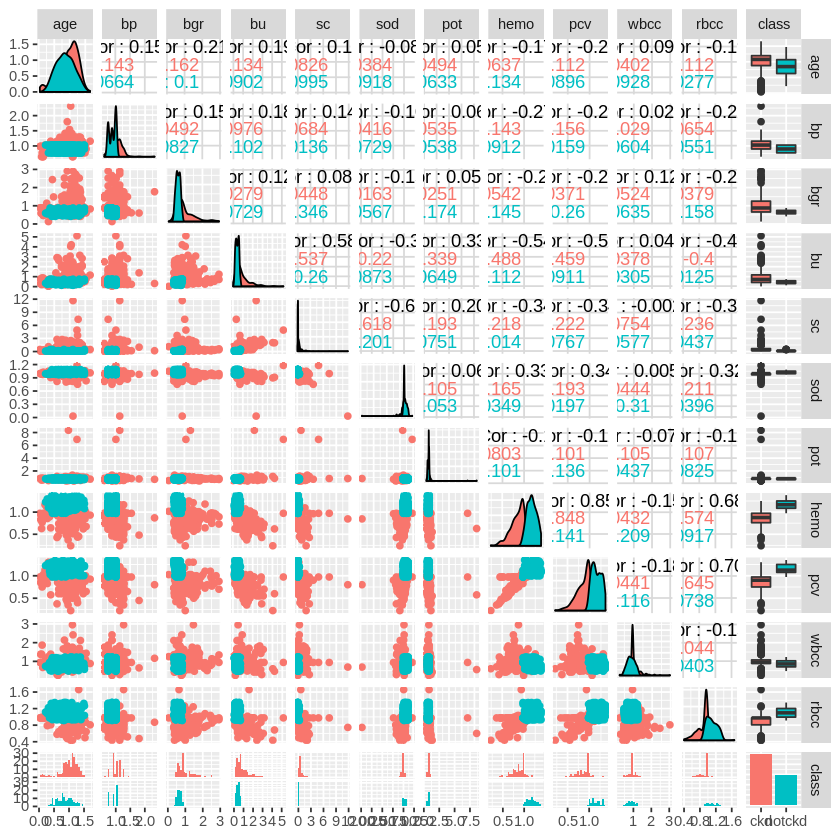

In [9]:
#look up what ggpair is and integrate it with our data set
ggpairs(kidneydat_var, mapping = ggplot2::aes(colour = class))

#here we exmine the boxplots and then pick the variables that display significant difference
#between the ckd/notckd

#explain what significant different is in terms of boxplots

#we pick
#hemo, pcv, sc, pot, tbcc

In [10]:
#make a new df with only the variables we picked hemo, pcv, sc, pot, tbcc
final_dat <- kidneydat_var %>% select(hemo, pcv, sc, pot, rbcc, class)
head(final_dat)

hemo,pcv,sc,pot,rbcc,class
1.1958231,1.1011476,0.1842338,0.8220934,1.0774127,ckd
0.8774546,0.9509911,0.1228225,0.8220934,0.9753558,ckd
0.7454482,0.7758086,0.2763506,0.8220934,0.9753558,ckd
0.8696895,0.8008346,0.5834069,0.4441594,0.8080595,ckd
0.9007499,0.8759129,0.2149394,0.8220934,0.9530958,ckd
0.9473404,0.9760172,0.1688809,0.5685240,0.9116569,ckd


**Seed set to (2019) so that we get the same randomization when we split our dataset.
First, we Split the data into training/testing set
then we use 10 fold CV to find the best K.**

**Then we use the best K for knn classification.
We then predict the class of testing set with the classification and assess the accuracy score.**

**After doing multiple knn classification we found that hemo (hemoglobin) and rbcc (red blood cell count) achieves the highest score, which is 0.94067797. We then choose that as our final model**

**See multiple calculations below - Note comments in calculations for more details**

In [11]:
#now lets build training/testing set
#train one with all the explanatory vars we picked
#10 fold cv to pick best k
set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train <- final_dat %>% 
  select(hemo, pcv, sc, pot, rbcc) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test <- final_dat %>% 
  select(hemo, pcv, sc, pot, rbcc) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

In [12]:
train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_cv_10 <- train(x = X_train, 
                       y = Y_train, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_cv_10

In [13]:
k_accuracies <- knn_reg_cv_10$results
#k_accuracies

In [14]:
k_all = data.frame(k = 28) 
knn_reg_all <- train(x = X_train, 
                       y = Y_train, 
                       method = "knn", 
                       tuneGrid = k_all, 
                       trControl = train_control) 
#knn_reg_all
test_pred_all <- predict(knn_reg_all, X_test)
test_results <- confusionMatrix(data = factor(test_pred_all), reference = factor(Y_test))
#test_results
accuracy_all <- test_results$overall[1]
#accuracy_all

In [15]:
#train on just 1 explanatory variable
#hemo --->  0.898305084745763
set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_hemo <- final_dat %>% 
  select(hemo) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_hemo <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_hemo <- final_dat %>% 
  select(hemo) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_hemo <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_hemo <- train(x = X_train_hemo, 
                       y = Y_train_hemo, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
knn_reg_hemo

k-Nearest Neighbors 

279 samples
  1 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 250, 250, 252, 252, 252, 250, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9213738  0.8344867
   2  0.9246898  0.8416821
   3  0.9318418  0.8575801
   4  0.9355455  0.8647636
   5  0.9318418  0.8575801
   6  0.9318418  0.8575801
   7  0.9318418  0.8575801
   8  0.9283935  0.8498519
   9  0.9318418  0.8575801
  10  0.9320972  0.8570354
  11  0.9355455  0.8647636
  12  0.9283935  0.8498519
  13  0.9318418  0.8575801
  14  0.9318418  0.8575801
  15  0.9318418  0.8575801
  16  0.9318418  0.8575801
  17  0.9318418  0.8575801
  18  0.9283935  0.8498519
  19  0.9318418  0.8575801
  20  0.9318418  0.8575801
  21  0.9318418  0.8575801
  22  0.9318418  0.8575801
  23  0.9318418  0.8575801
  24  0.9318418  0.8575801
  25  0.9318418  0.8575801
  26  0.9318418  0.8575801
  27  0.9355455  0.8647636
  

In [16]:
k_hemo = data.frame(k = 29) 
knn_reg_hemo <- train(x = X_train_hemo, 
                       y = Y_train_hemo, 
                       method = "knn", 
                       tuneGrid = k_hemo, 
                       trControl = train_control) 
#knn_reg_hemo
test_pred_hemo <- predict(knn_reg_hemo, X_test_hemo)
test_results <- confusionMatrix(data = factor(test_pred_hemo), reference = factor(Y_test_hemo))
#test_results
accuracy_hemo <- test_results$overall[1]
#accuracy_hemo

In [17]:
#pcv ---> 0.906779661016949
set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_pcv <- final_dat %>% 
  select(pcv) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_pcv <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_pcv <- final_dat %>% 
  select(pcv) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_pcv <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_pcv <- train(x = X_train_pcv, 
                       y = Y_train_pcv, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
knn_reg_pcv

k-Nearest Neighbors 

279 samples
  1 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 250, 250, 252, 252, 252, 250, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9032430  0.7996058
   2  0.8996716  0.7912404
   3  0.8959679  0.7831696
   4  0.9033753  0.7993291
   5  0.8995393  0.7915350
   6  0.9032430  0.7996058
   7  0.8922642  0.7750615
   8  0.8959679  0.7831696
   9  0.8959679  0.7831323
  10  0.8958356  0.7834268
  11  0.8996716  0.7912404
  12  0.8959679  0.7831696
  13  0.8959679  0.7831323
  14  0.9065681  0.8064236
  15  0.9138433  0.8228777
  16  0.9102718  0.8145123
  17  0.9065681  0.8064236
  18  0.9138433  0.8228777
  19  0.9101396  0.8147890
  20  0.9102718  0.8145123
  21  0.9101396  0.8147890
  22  0.9065681  0.8064236
  23  0.9102718  0.8145123
  24  0.9102718  0.8145123
  25  0.9101396  0.8147890
  26  0.9138433  0.8221529
  27  0.9209861  0.8345598
  

In [18]:
k_pcv = data.frame(k = 28) 
knn_reg_pcv <- train(x = X_train_pcv, 
                       y = Y_train_pcv, 
                       method = "knn", 
                       tuneGrid = k_pcv, 
                       trControl = train_control) 
#knn_reg_pcv
test_pred_pcv <- predict(knn_reg_pcv, X_test_pcv)
test_results <- confusionMatrix(data = factor(test_pred_pcv), reference = factor(Y_test_pcv))
#test_results
accuracy_pcv <- test_results$overall[1]
#accuracy_pcv

In [19]:
#sc ---> 0.788135593220339
set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_sc <- final_dat %>% 
  select(sc) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_sc <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_sc <- final_dat %>% 
  select(sc) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_sc <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_sc <- train(x = X_train_sc, 
                       y = Y_train_sc, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_sc

In [20]:
k_sc = data.frame(k = 8) 
knn_reg_sc <- train(x = X_train_sc, 
                       y = Y_train_sc, 
                       method = "knn", 
                       tuneGrid = k_sc, 
                       trControl = train_control) 
#knn_reg_sc
test_pred_sc <- predict(knn_reg_sc, X_test_sc)
test_results <- confusionMatrix(data = factor(test_pred_sc), reference = factor(Y_test_sc))
#test_results
accuracy_sc <- test_results$overall[1]
#accuracy_sc

In [21]:
#pot ---> 0.76271186440678
set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_pot <- final_dat %>% 
  select(pot) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_pot <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_pot <- final_dat %>% 
  select(pot) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_pot <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_pot <- train(x = X_train_pot, 
                       y = Y_train_pot, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_pot

In [22]:
k_pot = data.frame(k = 2) 
knn_reg_pot <- train(x = X_train_pot, 
                       y = Y_train_pot, 
                       method = "knn", 
                       tuneGrid = k_pot, 
                       trControl = train_control) 
#knn_reg_pot
test_pred_pot <- predict(knn_reg_pot, X_test_pot)
test_results <- confusionMatrix(data = factor(test_pred_pot), reference = factor(Y_test_pot))
#test_results
accuracy_pot <- test_results$overall[1]
#accuracy_pot

In [23]:
#rbcc ---> 0.915254237288136
set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_rbcc <- final_dat %>% 
  select(rbcc) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_rbcc <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_rbcc <- final_dat %>% 
  select(rbcc) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_rbcc <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_rbcc <- train(x = X_train_rbcc, 
                       y = Y_train_rbcc, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_rbcc

In [24]:
k_rbcc = data.frame(k = 1) 
knn_reg_rbcc <- train(x = X_train_rbcc, 
                       y = Y_train_rbcc, 
                       method = "knn", 
                       tuneGrid = k_rbcc, 
                       trControl = train_control) 
#knn_reg_rbcc
test_pred_rbcc <- predict(knn_reg_rbcc, X_test_rbcc)
test_results <- confusionMatrix(data = factor(test_pred_rbcc), reference = factor(Y_test_rbcc))
#test_results
accuracy_rbcc <- test_results$overall[1]
#accuracy_rbcc

In [25]:
set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_hemo_pcv <- final_dat %>% 
  select(hemo, pcv) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_hemo_pcv <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_hemo_pcv <- final_dat %>% 
  select(hemo, pcv) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_hemo_pcv <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_hemo_pcv <- train(x = X_train_hemo_pcv, 
                       y = Y_train_hemo_pcv, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_hemo_pcv

# K=32

In [26]:
#hemo & pcv accuracy -> Accuracy: 0.932203389830508

set.seed(2019)
k_hemo_pcv = data.frame(k = 32) 
knn_reg_hemo_pcv <- train(x = X_train_hemo_pcv, 
                       y = Y_train_hemo_pcv, 
                       method = "knn", 
                       tuneGrid = k_hemo_pcv, 
                       trControl = train_control) 
#knn_reg_hemo_pcv
test_pred_hemo_pcv <- predict(knn_reg_hemo_pcv, X_test_hemo_pcv)
test_results <- confusionMatrix(data = factor(test_pred_hemo_pcv), reference = factor(Y_test_hemo_pcv))
#test_results
accuracy_hemo_pcv <- test_results$overall[1]
#accuracy_hemo_pcv

In [27]:
#hemo_rbcc

set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_hemo_rbcc <- final_dat %>% 
  select(hemo, rbcc) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_hemo_rbcc <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_hemo_rbcc <- final_dat %>% 
  select(hemo, rbcc) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_hemo_rbcc <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_hemo_rbcc <- train(x = X_train_hemo_rbcc, 
                       y = Y_train_hemo_rbcc, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
knn_reg_hemo_rbcc

#k=5

k-Nearest Neighbors 

279 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 250, 250, 252, 252, 252, 250, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9028462  0.7892249
   2  0.9064176  0.7966138
   3  0.9029785  0.7896733
   4  0.9174056  0.8221720
   5  0.9387292  0.8710258
   6  0.9351578  0.8641155
   7  0.9315864  0.8561687
   8  0.9351578  0.8641155
   9  0.9354132  0.8648293
  10  0.9318418  0.8570027
  11  0.9317095  0.8563873
  12  0.9354132  0.8648293
  13  0.9318418  0.8570027
  14  0.9352901  0.8647309
  15  0.9318418  0.8570027
  16  0.9318418  0.8570027
  17  0.9283935  0.8495477
  18  0.9246898  0.8411057
  19  0.9246898  0.8411057
  20  0.9281381  0.8485607
  21  0.9281381  0.8485607
  22  0.9317095  0.8554563
  23  0.9351578  0.8631845
  24  0.9352810  0.8625767
  25  0.9317095  0.8544636
  26  0.9282613  0.8470086
  27  0.9246898  0.8386220
  

**Assessing the the k that yeilds highest accuracy by plotting. Highest accuracy at k = 5**

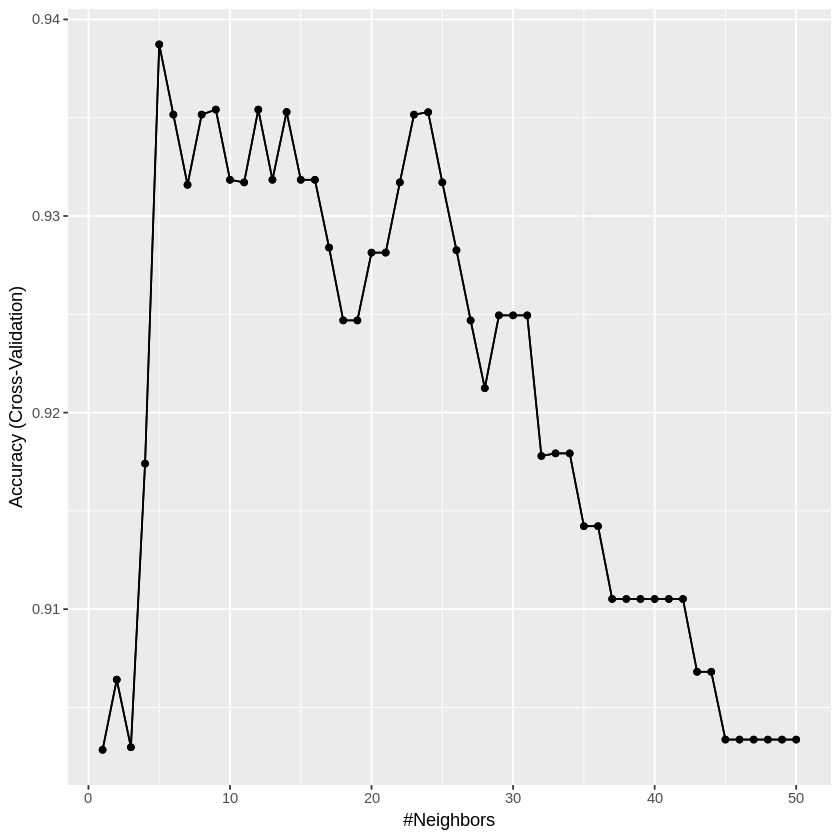

In [28]:
choose_k_plot <- knn_reg_hemo_rbcc %>% ggplot(aes(x = k , y = Accuracy)) + geom_line() + geom_point()
choose_k_plot

In [29]:
#hemo & rbcc accuracy -> Accuracy: 0.940677966101695

set.seed(2019)
k_hemo_rbcc = data.frame(k = 5) 
knn_reg_hemo_rbcc <- train(x = X_train_hemo_rbcc, 
                       y = Y_train_hemo_rbcc, 
                       method = "knn", 
                       tuneGrid = k_hemo_rbcc, 
                       trControl = train_control) 
knn_reg_hemo_rbcc
test_pred_hemo_rbcc <- predict(knn_reg_hemo_rbcc, X_test_hemo_rbcc)
test_results <- confusionMatrix(data = factor(test_pred_hemo_rbcc), reference = factor(Y_test_hemo_rbcc))
test_results
accuracy_hemo_rbcc <- test_results$overall[1]
accuracy_hemo_rbcc

k-Nearest Neighbors 

279 samples
  2 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 251, 251, 251, 251, 252, 251, ... 
Resampling results:

  Accuracy   Kappa    
  0.9354497  0.8644691

Tuning parameter 'k' was held constant at a value of 5

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd     68      1
    notckd   6     43
                                          
               Accuracy : 0.9407          
                 95% CI : (0.8816, 0.9758)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 1.889e-15       
                                          
                  Kappa : 0.876           
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9189          
            Specificity : 0.9773          
         Pos Pred Value : 0.9855          
         Neg Pred Value : 0.8776          
             Prevalence : 0.6271          
         Detection Rate : 0.5763          
   Detection Prevalence : 0.5847          
      Balanced Accuracy : 0.9481          
                                          
       'Positive' Class : ckd             
                                          

Accuracy 
0.940678

**Visualization for our best knn classification**

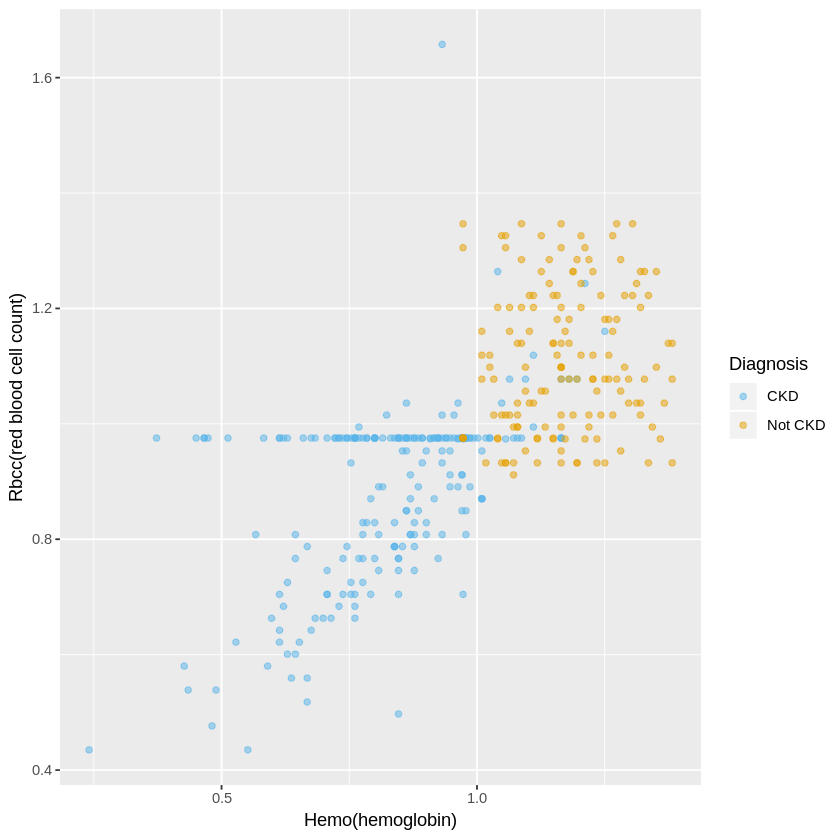

In [30]:
#visualization of classification model of hemo & rbcc
cbPalette <- c("#56B4E9", "#E69F00","#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999") 

ckd_plot <-  final_dat %>%
ggplot(aes(x = hemo, y = rbcc, color = class)) + 
    geom_point(alpha = 0.5) +
    labs(color = "Diagnosis") +
xlab("Hemo(hemoglobin)")+
ylab("Rbcc(red blood cell count)")+
    scale_color_manual(labels = c("CKD", "Not CKD"), values = cbPalette)
ckd_plot

In [31]:
#pcv_rbcc

set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_pcv_rbcc <- final_dat %>% 
  select(pcv, rbcc) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_pcv_rbcc <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_pcv_rbcc <- final_dat %>% 
  select(pcv, rbcc) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_pcv_rbcc <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_pcv_rbcc <- train(x = X_train_pcv_rbcc, 
                       y = Y_train_pcv_rbcc, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_pcv_rbcc

#k=23

In [32]:
#pcv & rbcc accuracy -> Accuracy: 0.923728813559322

set.seed(2019)
k_pcv_rbcc = data.frame(k = 23) 
knn_reg_pcv_rbcc <- train(x = X_train_pcv_rbcc, 
                       y = Y_train_pcv_rbcc, 
                       method = "knn", 
                       tuneGrid = k_pcv_rbcc, 
                       trControl = train_control) 
#knn_reg_pcv_rbcc
test_pred_pcv_rbcc <- predict(knn_reg_pcv_rbcc, X_test_pcv_rbcc)
test_results <- confusionMatrix(data = factor(test_pred_pcv_rbcc), reference = factor(Y_test_pcv_rbcc))
#test_results
accuracy_pcv_rbcc <- test_results$overall[1]
#accuracy_pcv_rbcc

In [33]:
#sc_hemo

set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_sc_hemo <- final_dat %>% 
  select(sc, hemo) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_sc_hemo <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_sc_hemo <- final_dat %>% 
  select(sc, hemo) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_sc_hemo <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_sc_hemo <- train(x = X_train_sc_hemo, 
                       y = Y_train_sc_hemo, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_sc_hemo

#k=50

In [34]:
#sc & hemo accuracy -> Accuracy: 0.915254237288136

set.seed(2019)
k_sc_hemo = data.frame(k = 50) 
knn_reg_sc_hemo <- train(x = X_train_sc_hemo, 
                       y = Y_train_sc_hemo, 
                       method = "knn", 
                       tuneGrid = k_sc_hemo, 
                       trControl = train_control) 
#knn_reg_sc_hemo
test_pred_sc_hemo <- predict(knn_reg_sc_hemo, X_test_sc_hemo)
test_results <- confusionMatrix(data = factor(test_pred_sc_hemo), reference = factor(Y_test_sc_hemo))
#test_results
accuracy_sc_hemo <- test_results$overall[1]
#accuracy_sc_hemo

In [35]:
#sc_pcv

set.seed(2019)
training_rows <- final_dat %>% 
  select(class) %>% 
  unlist() %>% # converts Class from a tibble to a vector
  createDataPartition(p = 0.7, list = FALSE)

X_train_sc_pcv <- final_dat %>% 
  select(sc, pcv) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train_sc_pcv <- final_dat %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test_sc_pcv <- final_dat %>% 
  select(sc, pcv) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test_sc_pcv <- final_dat %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

k_lots = data.frame(k = seq(from = 1, to = 50, by = 1)) 
knn_reg_sc_pcv <- train(x = X_train_sc_pcv, 
                       y = Y_train_sc_pcv, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
#knn_reg_sc_pcv

#k=26

In [36]:
#sc & pcv accuracy -> Accuracy: 0.923728813559322

set.seed(2019)
k_sc_pcv = data.frame(k = 26) 
knn_reg_sc_pcv <- train(x = X_train_sc_pcv, 
                       y = Y_train_sc_pcv, 
                       method = "knn", 
                       tuneGrid = k_sc_pcv, 
                       trControl = train_control) 
#knn_reg_sc_pcv
test_pred_sc_pcv <- predict(knn_reg_sc_pcv, X_test_sc_pcv)
test_results <- confusionMatrix(data = factor(test_pred_sc_pcv), reference = factor(Y_test_sc_pcv))
#test_results
accuracy_sc_pcv <- test_results$overall[1]
#accuracy_sc_pcv

**Making a table with training and testing accuracy of all our models for organizational purposes**

In [37]:
variables <- c("all 5","hemo","pcv","sc","pot","rbcc","hemo & pcv","hemo & rbcc","pcv & rbcc","sc & hemo","sc & pcv")
variables

[1] "all 5"       "hemo"        "pcv"         "sc"          "pot"        
 [6] "rbcc"        "hemo & pcv"  "hemo & rbcc" "pcv & rbcc"  "sc & hemo"  
[11] "sc & pcv"

In [38]:
testing_accuracies <- c("0.932203389830508","0.898305084745763","0.906779661016949","0.788135593220339","0.76271186440678","0.915254237288136","0.932203389830508","0.940677966101695","0.923728813559322","0.915254237288136","0.923728813559322")
testing_accuracies

[1] "0.932203389830508" "0.898305084745763" "0.906779661016949"
 [4] "0.788135593220339" "0.76271186440678"  "0.915254237288136"
 [7] "0.932203389830508" "0.940677966101695" "0.923728813559322"
[10] "0.915254237288136" "0.923728813559322"

In [39]:
training_accuracies <- c("0.9503512","0.9355455","0.9174421","0.8892492","0.7593277","0.9072204","0.9464286","0.9354497","0.9208995","0.9428571","0.9247354")
training_accuracies

[1] "0.9503512" "0.9355455" "0.9174421" "0.8892492" "0.7593277" "0.9072204"
 [7] "0.9464286" "0.9354497" "0.9208995" "0.9428571" "0.9247354"

In [40]:
comparison_accuracy <- tibble(variables,testing_accuracies,training_accuracies)
comparison_accuracy

variables,testing_accuracies,training_accuracies
all 5,0.932203389830508,0.9503512
hemo,0.898305084745763,0.9355455
pcv,0.906779661016949,0.9174421
sc,0.788135593220339,0.8892492
pot,0.76271186440678,0.7593277
rbcc,0.915254237288136,0.9072204
hemo & pcv,0.932203389830508,0.9464286
hemo & rbcc,0.940677966101695,0.9354497
pcv & rbcc,0.923728813559322,0.9208995
sc & hemo,0.915254237288136,0.9428571


<h2>Analysis: </h2>

For choosing which variables should we use for knn classification 

<h2>Discussions: </h2>

For this project, our aim is to try to answer the question: “Which variables are most effective in classifying whether a patient has CKD or not, and is using K-nn classification to predict CKD effective?”

In order to find the most effective variables for CKD/ non CKD classification, we first need to try all the combinations of qualitative variables. The most common way would be through 'stepwise', meaning we start by assessing the accuracy scores of all the 1 variable classification. Then we pick the two with the highest accuracy scores then use them to perform another classification. This goes on until the accuracy score no longer shows significant improvement. In the end our final knn-classification is with two variables. We think having two variables (hemo and rbcc) is good because we are aware of the constraints of high dimensionality when using knn classification.

We initially picked out a total of five variables by observing the boxplot generated by ggpair function. Then we built a total of 11 k-nn classification models with 1 variable, 2 variables, as well as 2+ variables. By comparing the prediction accuracy scores of these models, the one based on hemo (hemoglobin) and rbcc(red blood cells) achieves the highest accuracy score of **0.941**. 

We then concluded that among all the other knn-classifications we attempted, the combination of hemo and rbcc is the most effective predictor to diagnose whether a patient has chronic kidneay disease or not. 

We are confident that by using hemo and rbcc, we can effectively classify whether a patient has kidney disease or not. However, to keep in mind, there is no such thing as the best classifier. It really depends on the context, the data, and the problem we are trying to solve. There are a couple drawbacks from using knn classification. 

knn classification can be computationally expensive and slow if we have a hugh dataset as it goes over the data each time we run a prediction, and it might not be best for high dimentional space (i.e. have many predictors), as the distance between neighbours becomes more or less the same.

Furthermore, our findings above can have the following impacts: 
1. Since CKD is a disease which can be prevented by ‘early correct predictions and proper precautions’(Tazin, Sabab & Chowdhury, 2016), the effective predictor power of hemo and rbcc may initiate a new page of medical advancement. 


2. According to US National Heart, Lung and Blood Institute, when one’s blood has a below-normal value of hemo and rbcc, the condition of anemia will occur. This strong and direct relationship between these two variables and anemia coupled with their effectiveness in predicting CKD may strengthen the existed bond between anemia and CKD. 


However, this is not the end of the exploration of CKD, there are still a lot of questions remaining to answer. 
1.	Since we only randomly choose 11 combinations of the numerous possible ways of combining the 5 explanatory variables, is there any other more effective predictors of whether a patient has CDK or not?
2.	As we omit the 11 categorical variables of the dataset, will they cast significant impact on the classification process? For example, can the conditions of anemia be an effective variable to classify the CDK?



<h2>References</h2>

Anemia. (n.d.). Retrieved April 04, 2019, from https://www.nhlbi.nih.gov/health-topics/anemia

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Kidney Disease Statistics for the United States. (2016, December 01). Retrieved April 3, 2019, from https://www.niddk.nih.gov/health-information/health-statistics/kidney-disease.

Raschka, S. (2014, July 11). About Feature Scaling and Normalization. Retrieved from https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardizing-and-normalizing---how-it-can-be-done-using-scikit-learn

Tazin, N., Sabab, S., & Chowdhury, M. (2016). Diagnosis of Chronic Kidney Disease using effective classification and feature selection technique. 2016 International Conference On Medical Engineering, Health Informatics And Technology (Meditec). doi: 10.1109/meditec.2016.7835365

